
1.   Обучить модели на параллельных вычислителях
2.   Переслать разные куски датасета для этих нейронок для обучения
3. Переслать данные для предсказания
4. Предсказание сделать ансамблевым методом

In [1]:
!pip install mpi4py

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
--- Logging error ---
Traceback (most recent call last):
  File "/home/radmin/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/radmin/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/radmin/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/radmin/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/radmin/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/radmin/.loca

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from mpi4py import MPI

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Invalid MIT-MAGIC-COOKIE-1 key

Скачаем датасет Country211

In [3]:
img_size = (300, 450)

transform = transforms.Compose(
    [transforms.Resize(img_size),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [9]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

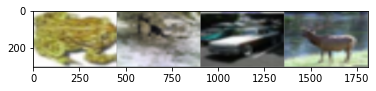

frog  cat   car   deer 


In [14]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Обучение

In [11]:
!mpirun -n 4 python3 train.py

### Тестирование

In [12]:
!mpirun -n 4 python3 test.py